In [1]:
# https://git.lab.karpov.courses/lab/final_project/-/merge_requests/2108

<h1>A/B тест оплаты услуг на сайте</h1><br>

<h3>Задание 1. A/B–тестирование</h3>

<h6>1.1 Условие</h6>

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. <br>
Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе <br>
была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика.<br>
В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать <br>
новую механику оплаты на всех пользователей.

<h6>1.2 Входные данные</h6>

В качестве входных данных Вы имеете 4 csv-файла:

   - groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, <br>
        B –   целевая группа) 
   - groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
   - active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
   - checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 

<h6>1.3 Вопросы</h6>

Предлагаем Вам ответить на следующие вопросы:

   1. На какие метрики Вы смотрите в ходе анализа и почему?
   2. Имеются ли различия в показателях и с чем они могут быть связаны?
   3. Являются ли эти различия статистически значимыми?
   4. Стоит ли запускать новую механику на всех пользователей?

Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

<h6>1.4 Требования к ответу</h6>

При выполнении тестового задания необходимо использовать язык программирования Python.<br>
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными.<br>
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

<h4> Библиотеки

In [93]:
# Подключим библиотеки
import os

from datetime import datetime
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import scipy.stats as ss
import pingouin as pg


<h4> Считаем данные

In [3]:
# Зададим словарь с расположением файлов
paths_files = dict([
                                    ('groups' , 'Проект_2_groups.csv'),
                                    ('groups_add' , 'Проект_2_group_add.csv'),
                                    ('active_studs' , 'Проект_2_active_studs.csv'),
                                    ('checks' , 'Проект_2_checks.csv'),
                                  ])

# Cчитаем данные
groups = pd.read_csv(paths_files['groups'], sep=';')
groups_add = pd.read_csv(paths_files['groups_add'])
active_studs= pd.read_csv(paths_files['active_studs'], sep=';')
checks = pd.read_csv(paths_files['checks'], sep=';')

<h4> Проанализируем данные

In [4]:
# Размеры таблиц
print("Размер таблицы с пользователями: \n{}".format(groups.shape), "\n")
print("Размер таблицы о новыми пользователями: \n{}".format(groups_add.shape), "\n")
print("Размер таблицы с активными пользователями в дни проведения эксперимента: \n{}".format(active_studs.shape), "\n")
print("Размер таблицы об оплатах пользователей в дни проведения эксперимента: \n{}".format(checks.shape))

Размер таблицы с пользователями: 
(74484, 2) 

Размер таблицы о новыми пользователями: 
(92, 2) 

Размер таблицы с активными пользователями в дни проведения эксперимента: 
(8341, 1) 

Размер таблицы об оплатах пользователей в дни проведения эксперимента: 
(541, 2)


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [5]:
# Типы таблиц
print("Размер таблицы с пользователями: \n{}".format(groups.dtypes), "\n")
print("Размер таблицы о новыми пользователями: \n{}".format(groups_add.dtypes), "\n")
print("Размер таблицы с активными пользователями в дни проведения эксперимента: \n{}".format(active_studs.dtypes), "\n")
print("Размер таблицы об оплатах пользователей в дни проведения эксперимента: \n{}".format(checks.dtypes))

Размер таблицы с пользователями: 
id      int64
grp    object
dtype: object 

Размер таблицы о новыми пользователями: 
id      int64
grp    object
dtype: object 

Размер таблицы с активными пользователями в дни проведения эксперимента: 
student_id    int64
dtype: object 

Размер таблицы об оплатах пользователей в дни проведения эксперимента: 
student_id      int64
rev           float64
dtype: object


In [6]:
# Приведем к правильным типам данных, чтобы избежать ошибок в дальнейшем
groups = groups.astype({"id" : "str","grp" : "str"})
groups_add = groups_add.astype({"id" : "str","grp" : "str"})
active_studs = active_studs.astype({"student_id" : "str"})
checks = checks.astype({"student_id" : "str"})

In [7]:
# Пропуски в таблицах
print("Размер таблицы с пользователями: \n{}".format(groups.isna().sum()), "\n")
print("Размер таблицы о новыми пользователями: \n{}".format(groups_add.isna().sum()), "\n")
print("Размер таблицы с активными пользователями в дни проведения эксперимента: \n{}".format(active_studs.isna().sum()), "\n")
print("Размер таблицы об оплатах пользователей в дни проведения эксперимента: \n{}".format(checks.isna().sum()))
# Пропусков в таблицах нет!

Размер таблицы с пользователями: 
id     0
grp    0
dtype: int64 

Размер таблицы о новыми пользователями: 
id     0
grp    0
dtype: int64 

Размер таблицы с активными пользователями в дни проведения эксперимента: 
student_id    0
dtype: int64 

Размер таблицы об оплатах пользователей в дни проведения эксперимента: 
student_id    0
rev           0
dtype: int64


In [8]:
# Проверим таблицы на уникальных пользователей (совпадают ли они с размером самой таблицы или есть повторения данных)
print("Размер таблицы с пользователями {0} cовпадает с числом уникальных пользователей {1}."\
      .format(groups.shape[0], groups.id.nunique()), "\n")
print("Размер таблицы о новыми пользователями {0} cовпадает с числом уникальных пользователей {1}."\
      .format(groups_add.shape[0], groups_add.id.nunique()), "\n")
print("Размер таблицы с активными пользователями в дни проведения эксперимента {0} cовпадает с числом уникальных пользователей {1}."\
      .format(active_studs.shape[0], active_studs.student_id.nunique()), "\n")
print("Размер таблицы об оплатах пользователей в дни проведения эксперимента {0} cовпадает с числом уникальных пользователей {1}."\
      .format(checks.shape[0], checks.student_id.nunique()), "\n")

Размер таблицы с пользователями 74484 cовпадает с числом уникальных пользователей 74484. 

Размер таблицы о новыми пользователями 92 cовпадает с числом уникальных пользователей 92. 

Размер таблицы с активными пользователями в дни проведения эксперимента 8341 cовпадает с числом уникальных пользователей 8341. 

Размер таблицы об оплатах пользователей в дни проведения эксперимента 541 cовпадает с числом уникальных пользователей 541. 



In [9]:
# Проверим, встречаются ли пользователи из таблицы "groups_add" в таблице "groups"
# Используем метод .isin()
print(f"Найдено {groups.id.isin(groups_add.id).sum()} совпадений пользователей в таблице \"groups\" с таблицей \"groups_add\"")

Найдено 0 совпадений пользователей в таблице "groups" с таблицей "groups_add"


In [10]:
# Данные в таблицах не повторяются, поэтому их можно смерджить, не получив декартова произведения
groups_all = groups.merge(groups_add, how="outer", on=['id', 'grp'])

In [11]:
# Проверим, встречаются ли пользователи из таблицы "active_studs" в таблице "checks"
print(f"Найдено {checks.student_id.isin(active_studs.student_id).sum()} совпадений пользователей в таблице \"checks\" с таблицей \"active_studs\" ")

Найдено 392 совпадений пользователей в таблице "checks" с таблицей "active_studs" 


Тоесть всего 392 (из 541) пользователя в с таблице об оплатах в дни проведения эксперимента "checks", встречаются в таблице пользователей зашедших на платформу в дни проведения эксперимента "active_studs". А что с остальными <b>149 пользователями</b>???<br>(возможно это люди с подписочной системой оплаты, где не требовалось заходить в сервис для совершнения транзакции).

In [12]:
# Добавим в таблицу с оплатами колонку "было ли посещение в дни проведения эксперимента"
checks["visit_in_experiment_days"] = checks.student_id.isin(active_studs.student_id)
checks["visit_in_experiment_days"] = checks.visit_in_experiment_days.apply(lambda x: "yes visit" if x == True else "no visit")

# Такую же  колонку довавим в таблицу с пользoвателями, которые посетили сервис в дни проведения эксперимента
active_studs["visit_in_experiment_days"] = "yes visit"

In [13]:
# Проверим, встречаются ли пользователи из таблицы "active_studs" в таблице "groups_all"
print(f"Найдено {active_studs.student_id.isin(groups_all.id).sum()} совпадений пользователей в таблице \"active_studs\" с таблицей \"groups_all\" ")

Найдено 8341 совпадений пользователей в таблице "active_studs" с таблицей "groups_all" 


Тоесть все пользователи (8341 из 8341), которые заходили на платформу в дни проведения эксперимента из таблицы "active_studs" найдены в общей таблице со всеми пользователями и каждому присвоена принадлежность к группе - <b>нет потерянных или непонятно откуда появившихся данных.

In [14]:
# Проверим, встречаются ли пользователи из таблицы "checks" в таблице "groups_all"
print(f"Найдено {checks.student_id.isin(groups_all.id).sum()} совпадений пользователей в таблице \"checks\" с таблицей \"groups_all\" ")

Найдено 541 совпадений пользователей в таблице "checks" с таблицей "groups_all" 


Тоесть все пользователи (541 из 541), которые совершили оплату в дни проведения эксперимента из таблицы "checks" найдены в общей таблице со всеми пользователями и каждому присвоена принадлежность к группе - <b>нет потерянных или непонятно откуда появившихся данных.

<h4> Соберём таблицу с пользователями, которые были в сервисе (все у кого была/не была оплата), присвоим им когорту, и отметём лишних пользователей, которых и не было в дни проведения эксперимента

In [15]:
# Получим обновленную таблицу с оплатами, где появляется и принадлежность к группе
checks_exp_upd = checks.merge(groups_all, how='left', left_on='student_id',  right_on='id')

In [16]:
# Проверим, все ли id равны, должно быть 541 значение
(checks_exp_upd.student_id == checks_exp_upd.id).sum()

541

In [17]:
# Все id совпадают, можно избавиться от одного из дублирующихся столбцов
checks_exp_upd.drop(axis=1, labels="id",inplace=True)

In [18]:
checks_exp_upd

,student_id,rev,visit_in_experiment_days,grp
0,1627,990.0,yes visit,A
1,3185,690.0,no visit,B
2,25973,690.0,no visit,B
3,26280,690.0,no visit,B
4,100300,990.0,yes visit,B
...,...,...,...,...
536,5645737,1900.0,yes visit,B
537,5651566,1900.0,yes visit,B
538,5662322,1900.0,yes visit,B
539,5681918,1900.0,yes visit,B


In [19]:
# Получим обновленную таблицу с посещениями в дни проведения эксперимента

# Создадим список всех пользователей с оплатами в дни проведения эксперимента
users_in_payment = list(checks_exp_upd.student_id)

# Уберем пользователей, которые встречающтся в таблице "checks_upd", чтобы не было ЗАДВОЕНИЯ
active_studs_upd = active_studs.query("student_id != @users_in_payment")
# Получим таблицу с посещениями в дни проведения эксперимента, где появляется и принадлежность к группе
active_studs_upd = active_studs_upd.merge(groups_all, how='left', left_on='student_id',  right_on='id')

In [20]:
# Проверим, все ли id равны, должно быть 7949 значение
(active_studs_upd.student_id == active_studs_upd.id).sum()

7949

In [21]:
# Все id совпадают, можно избавиться от одного из дублирующихся столбцов
active_studs_upd.drop(axis=1, labels="id",inplace=True)

In [22]:
active_studs_upd

,student_id,visit_in_experiment_days,grp
0,581585,yes visit,A
1,5723133,yes visit,A
2,3276743,yes visit,B
3,4238589,yes visit,A
4,4475369,yes visit,B
...,...,...,...
7944,264371,yes visit,B
7945,1794344,yes visit,B
7946,296883,yes visit,B
7947,3598448,yes visit,B


In [23]:
# Примерджим всех пользователей, совершивших оплату, поличим общую таблицу со всеми участниками в дни проведения эксперимента
users_exp_upd = active_studs_upd.merge(checks_exp_upd, on=['student_id','visit_in_experiment_days','grp'], how="outer")

# Заменим NaN на нули
users_exp_upd.rev = users_exp_upd.rev.fillna(0)

In [24]:
users_exp_upd

,student_id,visit_in_experiment_days,grp,rev
0,581585,yes visit,A,0.0
1,5723133,yes visit,A,0.0
2,3276743,yes visit,B,0.0
3,4238589,yes visit,A,0.0
4,4475369,yes visit,B,0.0
...,...,...,...,...
8485,5645737,yes visit,B,1900.0
8486,5651566,yes visit,B,1900.0
8487,5662322,yes visit,B,1900.0
8488,5681918,yes visit,B,1900.0


In [25]:
# Проверим "users_exp_upd" на дубликатыв пользователей
users_exp_upd.student_id.loc[users_exp_upd.student_id.duplicated()]

Series([], Name: student_id, dtype: object)

In [26]:
print(f"Дубликатов по пользователям {users_exp_upd.student_id.duplicated().sum()} штук.")

Дубликатов по пользователям 0 штук.


<h4> Проверим пользователей, которые оплатили, в дни эксперимента, но не заходили в сервис - к какой группе относятся эти пользователи 

In [27]:
checks_exp_upd.query('visit_in_experiment_days == "no visit"').grp.unique().tolist()

['B', 'A']

Видно, что пользователи, у которых была оплата, но не было фактического захода в сервис, отпосятся к обеим когортным группам. Это достаточно интересное наблюдение. Вероятно, система сплитования не отбирала этих пользователей в одну группу, а разбивала пользователей равномерно и рандомно.

По итогу мы имеем 3 таблицы:
1. <b>"users_exp_upd"</b>    - таблица (общая) со всеми пользователями, учавствовавшими в эксперименте;
2. <b>"active_studs_upd"</b> - таблица с пользователями, зашедшими в сервис в дни проведения эксперимента;
3. <b>"checks_exp_upd"</b>   - таблица с пользователями, у которых была оплата в дни проведения эксперимента.

<b><i>Будем анализировать следующие метрики:
    - ARPU  (средняя выручка на пользователя);
    - ARPPU (средняя выручка на платящего пользователя);
    - CR    (конверсия пользователя в покупателя).

<h4>1) ARPU  (средняя выручка на пользователя)

В этом пункте есть выбор: 
- сравнивать лишь активных пользователей, которые заходили в сервис в дни проведения эксперимента;
- сравнивать всех пользователей, включая тех, кто не заходил в сервис, но при производил оплату в дни проведения эксперимента.

Я предлагаю остановиться на 2-ом варианте (и следовать этому выбору в последующих АВ-тестах), дабы попросу, исходя из догадок, не тебять 149 пользователей, которые отметились действием в дни проведения эксперимента, пусть и не заходили в сервис.

In [30]:
# Число юзеров в группе А
count_users_A = users_exp_upd.query("grp == 'A'").shape[0]
# Выручка в группе А
sum_revenue_A = users_exp_upd.query("grp == 'A'").rev.sum()
# Средняя выручка в группе А
arpu_A = sum_revenue_A / count_users_A

# Число юзеров в группе B
count_users_B = users_exp_upd.query("grp == 'B'").shape[0]
# Выручка в группе B
sum_revenue_B = users_exp_upd.query("grp == 'B'").rev.sum()
# Средняя выручка в группе B
arpu_B = sum_revenue_B / count_users_B

# Выведем таблицу в ARPU по группам
arpu_frame = pd.DataFrame(index=["A","B"],
                          columns=["sum_revenue", "count_users", "arpu"], 
                          data=[[sum_revenue_A, count_users_A, arpu_A],
                                [sum_revenue_B, count_users_B, arpu_B]])
arpu_frame

,sum_revenue,count_users,arpu
A,92096.0000,1567,58.772176
B,481230.0036,6923,69.511773


Сразу можно отметить, что количество пользователей в контрольной группе А намного меньше, чем в тестовой группе B.

In [207]:
print(f"ARPU выше в тестовой группе на \
{round((arpu_frame.arpu['B'] / arpu_frame.arpu['A'] - 1) * 100, 2)}% \
по сравнению с контрольной группой.")

ARPU выше в тестовой группе на 18.27% по сравнению с контрольной группой.


Text(0.5, 0, 'Группы')

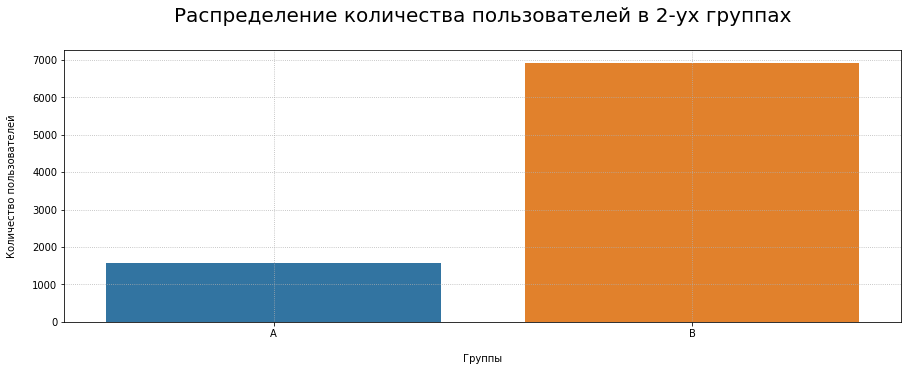

In [62]:
# Посмотрим на число пользователей в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
graf = sns.barplot(data=users_exp_upd.groupby("grp", as_index=False).agg({"student_id":"count"}).sort_values('grp', ascending=True), 
                        x="grp", 
                        y="student_id")

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
graf.set_title('Распределение количества пользователей в 2-ух группах\n', size=20)
graf.set_ylabel('Количество пользователей', labelpad=15, size=10)
graf.set_xlabel('Группы', labelpad=15, size=10)

# Легенда
#plt.legend(title="Группа")

# Подписи меток осей
#plt.xticks(fontsize=10) #range(len(labels)), labels, , rotation=45
#plt.yticks(fontsize=10)

Text(0.5, 0, 'Группы')

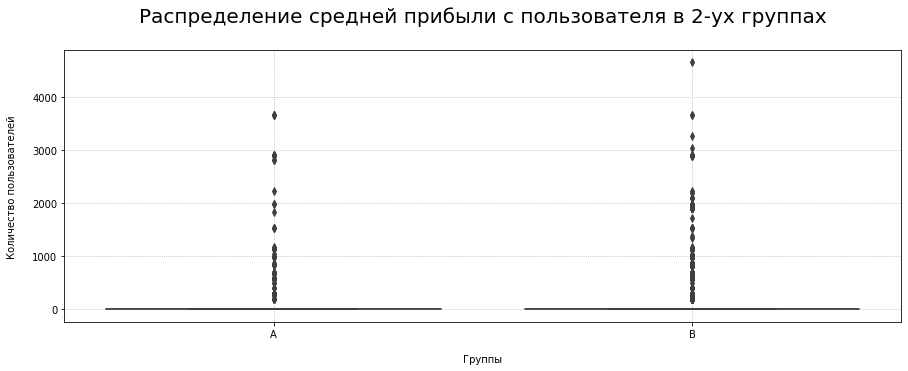

In [73]:
# Посмотрим распределение прибыли в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
graf = sns.boxplot(data=users_exp_upd, 
                                            x="grp", 
                                            y="rev")

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
plt.title('Распределение средней прибыли с пользователя в 2-ух группах\n', size=20)
plt.ylabel('Количество пользователей', labelpad=15, size=10)
plt.xlabel('Группы', labelpad=15, size=10)

Text(0.5, 6.79999999999999, 'Группы')

<Figure size 1080x360 with 0 Axes>

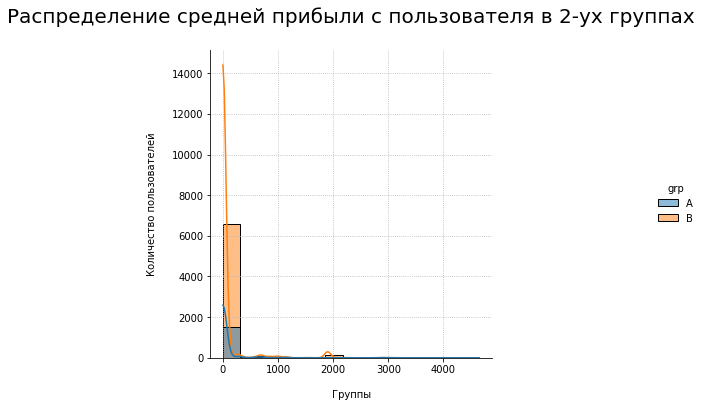

In [85]:
# Посмотрим на распределение прибыли в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
sns.displot(data=users_exp_upd, x='rev', hue="grp", kde=True)

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
plt.title('Распределение средней прибыли с пользователя в 2-ух группах\n', size=20)
plt.ylabel('Количество пользователей', labelpad=15, size=10)
plt.xlabel('Группы', labelpad=15, size=10)

По виду распределения не напоминают нормальные!

<b>Проверим распределения на нормальность.</b><br><br>
Так как выборки большого размера (1567 в группе А, 6923 в группе В, что явно больше 30), то лучше всего подойдет использование normaltest.

In [108]:
pg.normality(users_exp_upd, 
                             group="grp", 
                             dv='rev',
                             method="normaltest")

,W,pval,normal
A,2128.744222,0.0,False
B,7405.521370,0.0,False


Распределения в обеих группах не нормальные.

<b>Проверим распределения на  однородность дисперсий.</b><br><br>
Выдвинем гипотезы для проверки однородности дисперсий:
<li>$Н_0$ - дисперсии гомогенны</li>
<li>$Н_1$ - дисперсии НЕ гомогенны</li>   

Проверим распределения через критерий Левена.

In [109]:
pg.homoscedasticity(users_exp_upd, 
                                         group="grp", 
                                         dv='rev')

,W,pval,equal_var
levene,1.416929,0.233943,True


Дисперсии гомогенны.

На основе полученных данных (большие выборки, дисперсии однородны, распределения не нормальны) <b>можно использовать Т-тест Стъюдента</b>.

Выдвинем гипотезы для сравнения средних значений прибыли в группах:
- $Н_0$ - средние значения прибыли в группах не отличаются;
- $Н_1$ - средние значения прибыли в группах отличаются.

In [142]:
pg.ttest(users_exp_upd.query('grp == "A"').rev, 
                 users_exp_upd.query('grp == "B"').rev,
                 correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.190348,8488,two-sided,0.233943,"[-28.43, 6.95]",0.0333,0.064,0.22154


<h5>Так как p-value > 0.05, то оставляем $H_0$,
и делаем вывод - </h5>
    <br><i>Cредние значения прибыли по пользователям между группами стат.значимо неотличаются!
    Но также не будем забывать, что есть вопросы к системе сплитования и количество пользователей отличается сильно.

<h4>2) ARPPU  (средняя выручка на платящего пользователя)

In [122]:
# Число юзеров в группе А
count_pay_users_A = checks_exp_upd.query("grp == 'A'").shape[0]
# Выручка в группе А
sum_pay_revenue_A = checks_exp_upd.query("grp == 'A'").rev.sum()
# Средняя выручка в группе А
arppu_A = sum_pay_revenue_A / count_pay_users_A

# Число юзеров в группе B
count_pay_users_B = checks_exp_upd.query("grp == 'B'").shape[0]
# Выручка в группе B
sum_pay_revenue_B = checks_exp_upd.query("grp == 'B'").rev.sum()
# Средняя выручка в группе B
arppu_B = sum_pay_revenue_B / count_pay_users_B

# Выведем таблицу в ARPPU по группам
arppu_frame = pd.DataFrame(index=["A","B"],
                                                           columns=["sum_pay_revenue", "count_pay_users", "arppu"], 
                                                           data=[[sum_pay_revenue_A, count_pay_users_A, arppu_A],
                                                                        [sum_pay_revenue_B, count_pay_users_B, arppu_B]])
arppu_frame

,sum_pay_revenue,count_pay_users,arppu
A,92096.0000,107,860.710280
B,481230.0036,434,1108.824893


In [208]:
print(f"ARPPU выше в тестовой группе на \
{round((arppu_frame.arppu['B'] / arppu_frame.arppu['A'] - 1) * 100, 2)}% \
по сравнению с контрольной группой.")

ARPPU выше в тестовой группе на 28.83% по сравнению с контрольной группой.


Text(0.5, 0, 'Группы')

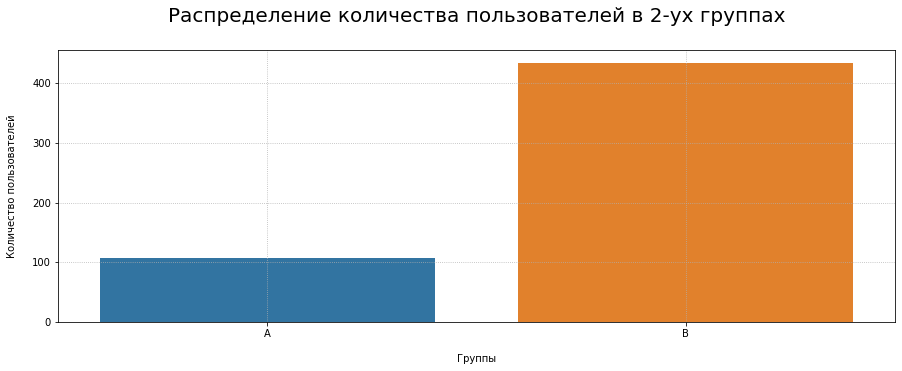

In [123]:
# Посмотрим на число пользователей в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
graf = sns.barplot(data=checks_exp_upd.groupby("grp", as_index=False).agg({"student_id":"count"}).sort_values('grp', ascending=True), 
                        x="grp", 
                        y="student_id")

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
graf.set_title('Распределение количества пользователей в 2-ух группах\n', size=20)
graf.set_ylabel('Количество пользователей', labelpad=15, size=10)
graf.set_xlabel('Группы', labelpad=15, size=10)

Text(0.5, 0, 'Группы')

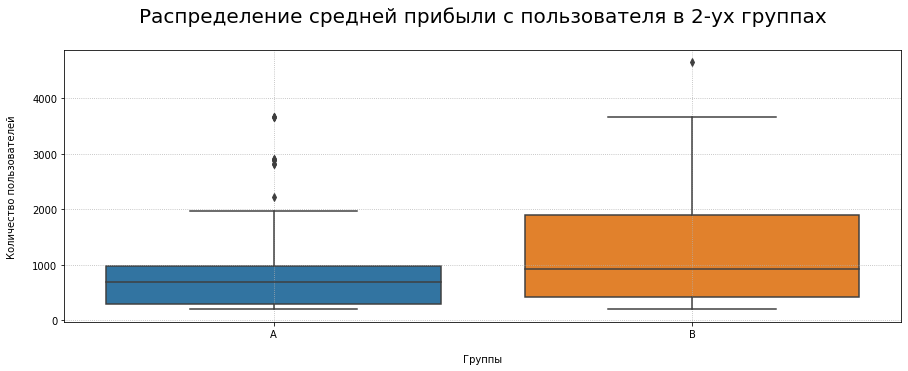

In [124]:
# Посмотрим распределение прибыли в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
graf = sns.boxplot(data=checks_exp_upd, 
                                            x="grp", 
                                            y="rev")

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
plt.title('Распределение средней прибыли с пользователя в 2-ух группах\n', size=20)
plt.ylabel('Количество пользователей', labelpad=15, size=10)
plt.xlabel('Группы', labelpad=15, size=10)

Text(0.5, 6.79999999999999, 'Группы')

<Figure size 1080x360 with 0 Axes>

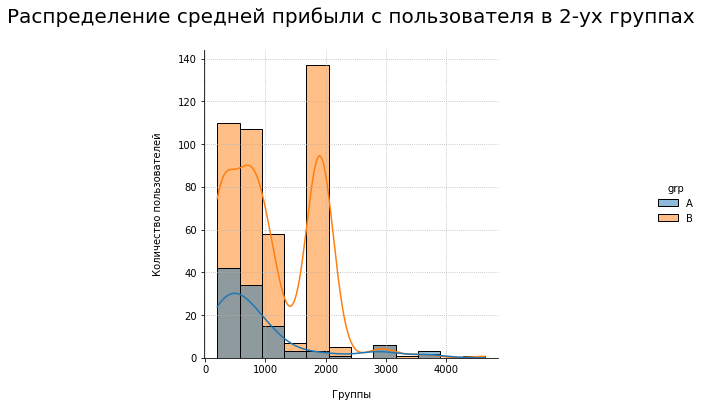

In [125]:
# Посмотрим на распределение прибыли в каждой группе

# Размер графика
plt.figure(figsize=(15,5))

# Нарисуем барплот
sns.displot(data=checks_exp_upd, x='rev', hue="grp", kde=True)

# Нарисуем сетку
plt.grid(visible=True, axis='both', linestyle=':')

# Подписи названию и осям графика
plt.title('Распределение средней прибыли с пользователя в 2-ух группах\n', size=20)
plt.ylabel('Количество пользователей', labelpad=15, size=10)
plt.xlabel('Группы', labelpad=15, size=10)

По виду распределения не напоминают нормальные!

<b>Проверим распределения на нормальность.</b><br><br>
Так как выборки большого размера (107 в группе А, 434 в группе В, что явно больше 30), то лучше всего подойдет использование normaltest.

In [129]:
pg.normality(checks_exp_upd, 
                             group="grp", 
                             dv='rev',
                             method="normaltest")

,W,pval,normal
A,52.218452,4.580439e-12,False
B,33.195875,6.188814e-08,False


Распределения в обеих группах не нормальные

<b>Проверим распределения на  однородность дисперсий.</b><br><br>
Выдвинем гипотезы для проверки однородности дисперсий:
<li>$Н_0$ - дисперсии гомогенны</li>
<li>$Н_1$ - дисперсии НЕ гомогенны</li>   

Проверим распределения через критерий Левена.

In [130]:
pg.homoscedasticity(checks_exp_upd, 
                                         group="grp", 
                                         dv='rev')

,W,pval,equal_var
levene,4.478901,0.034774,False


Дисперсии НЕ гомогенны.

На основе полученных данных (большие выборки, дисперсии неоднородны, распределения не нормальны) <b>можно использовать Т-тест Уэлча для неоднородных дисперсий в распределениях</b>.

Выдвинем гипотезы для сравнения средних значений прибыли в группах:
- $Н_0$ - средние значения прибыли в группах не отличаются;
- $Н_1$ - средние значения прибыли в группах отличаются.

In [145]:
pg.ttest(checks_exp_upd.query('grp == "A"').rev, 
                 checks_exp_upd.query('grp == "B"').rev,
                 correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.867019,152.06622,two-sided,0.004732,"[-419.09, -77.14]",0.327773,6.039,0.858002


<h5>Так как p-value < 0.05, то отбрасываем $H_0$,
и делаем вывод - </h5>
    <br><i>Cредние значения прибыли по пользователям между группами стат.значимо отличаются! И в тестовой группе В средняя прибыль <br>на платящего пользователя выше, чем в контрольной группе А.
<br> Но также не будем забывать, что есть вопросы к системе сплитования и количество пользователей отличается сильно.

<h4>3) CR  (конверсия пользователя в платящего пользователя)</h4>

Так как CR - это качественная переменная, то стоит использовать для сравнения этих переменных критерий согласия Пирсона (критерий Хи-квадрат).
Но на данном этапе, всех кто не заходил в сервис в дни проведения эксперимента стоит отбросить, так как эти пользователи скорее всего имеют подписочную модель и скорвертировались в платящего пользователя до проведения эксперимента и они сместят картину в пользу увеличения CR, что даст ложное представление о конверсии.

In [163]:
# Отфильтруем пользователей, которые заходили в сервис в дни проведения эксперимента
users_exp_upd_yes_visit = users_exp_upd.query("visit_in_experiment_days == 'yes visit'")

# Зададим новую колонку "purchase" - была ли совершена покупка
users_exp_upd_yes_visit["purchase"] = users_exp_upd_yes_visit.rev.apply(lambda x: False if x == 0 else True)
users_exp_upd_yes_visit

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,student_id,visit_in_experiment_days,grp,rev,purchase
0,581585,yes visit,A,0.0,False
1,5723133,yes visit,A,0.0,False
2,3276743,yes visit,B,0.0,False
3,4238589,yes visit,A,0.0,False
4,4475369,yes visit,B,0.0,False
...,...,...,...,...,...
8485,5645737,yes visit,B,1900.0,True
8486,5651566,yes visit,B,1900.0,True
8487,5662322,yes visit,B,1900.0,True
8488,5681918,yes visit,B,1900.0,True


In [173]:
# Создадим кросс таблицу с количеством пользователей и клиентов по группам
cr_crosstab = pd.crosstab(index      = users_exp_upd_yes_visit.purchase,
                                                   columns = users_exp_upd_yes_visit.grp,
                                                   values     = 'student_id', 
                                                   aggfunc  = 'count')
cr_crosstab

grp,A,B
purchase,,
False,1460,6489
True,78,314


In [241]:
# Число пользователей в каждой группе, и платил ли пользователь
users_exp_upd_yes_visit.groupby(['grp', 'purchase'], as_index=False).agg({'student_id':'count'})

,grp,purchase,student_id
0,A,False,1460
1,A,True,78
2,B,False,6489
3,B,True,314


In [210]:
# Все пользователи заходящие в сервис
users_exp_upd_yes_visit.groupby(['grp'], as_index=False).agg({'student_id':'count'})

,grp,student_id
0,A,1538
1,B,6803


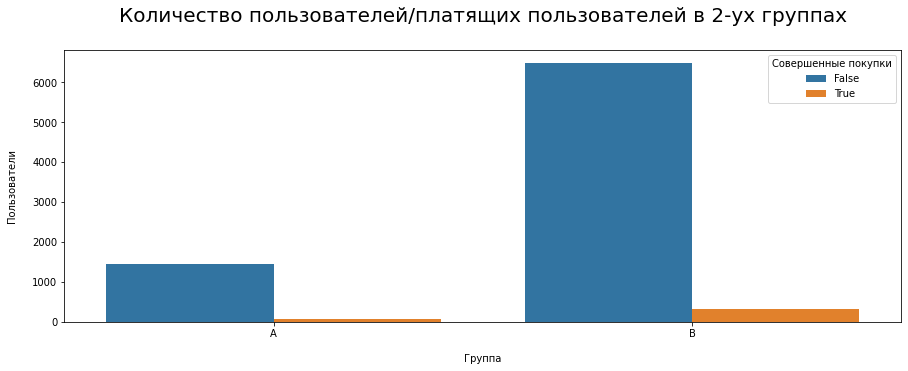

In [188]:
# Размер графика
plt.figure(figsize=(15,5))

sns.barplot(data=users_exp_upd_yes_visit.groupby(['grp', 'purchase'], as_index=False).agg({'student_id':'count'}), 
                        x='grp', 
                        y='student_id', 
                        hue="purchase")

# Сделаем подписи к графику
plt.title('Количество пользователей/платящих пользователей в 2-ух группах\n', size=20)
plt.ylabel('Пользователи', labelpad=15, size=10)
plt.xlabel('Группа', labelpad=15, size=10)


# Легенда
plt.legend(title="Cовершенные покупки")

In [240]:
# Посчитаем абсолютные значения CR в каждой группе

CR_A = (users_exp_upd_yes_visit.groupby(['grp', 'purchase'], as_index=False).agg({'student_id':'count'}).iloc[1].student_id / \
                users_exp_upd_yes_visit.groupby(['grp'], as_index=False).agg({'student_id':'count'}).iloc[0].student_id) \
                 *  100

CR_B = (users_exp_upd_yes_visit.groupby(['grp', 'purchase'], as_index=False).agg({'student_id':'count'}).iloc[3].student_id / \
                users_exp_upd_yes_visit.groupby(['grp'], as_index=False).agg({'student_id':'count'}).iloc[1].student_id) \
                 *  100

print(f'Конверсия в контрольной группе А = {round(CR_A, 2)}%.\
\nКонверсия в тестовой группе В          = {round(CR_B, 2)}%.')

Конверсия в контрольной группе А = 5.07%.
Конверсия в тестовой группе В          = 4.62%.


Выдвинем гипотезы для использования <i><b>критерия Хи-квадрат</i></b> для категориальной переменной "purchase":
    
- $H_0$ - различий в CR нет;
- $H_1$ - различия в CR есть.

<i><b>Для использования критерия Хи-квадрат выполняются следующие условия</i></b>:
1. Все наблюдения независимы;
2. Количество наблюдений в каждой группе > 5.

In [193]:
chi2_stat, pvalue, degrees_of_freedom, expected_freq  = ss.chi2_contingency(cr_crosstab)
chi2_stat, pvalue, degrees_of_freedom

(0.48480826522557896, 0.48625240457231045, 1)

In [194]:
pvalue < 0.05

False

<h5>
Так как p-value > 0.05, то оставляем $H_0$,
и делаем вывод - </h5>
    <br><i>статзначимых различий в CR нет.

<h4>Вывод по Заданию 1</h4>

В ходе задания, был реализован анализ данных, в котором двум группам пользователей предлагались различные механики оплат услуг на сайте..<br>
Были рассмотрены метрики:
- ARPU (средний доход с пользователей статистически не отличается в группе 'b'-тестовой по сравнению с группой 'a'-контрольной);
- ARPPU (средний доход с платящих пользователей статистически отличается 'b'-тестовой по сравнению с группой 'a'-контрольной, в тестовой группе средний доход с платящих пользователей на 12.75% выше);
- CR (не обнаружены статзначимые различия в конверсии пользователей в платящих пользователей в дни проведения эксперимента). 

На основе анализа вышеуказанных метрик, можно сделать однозначный вывод в пользу тестовой группы.<br>
Возможно выборки были сделаны криво, неравномерно, система сплитования работала плохо, количество пользователей в группах очень разнится. 
А также мы не знаем (можнм ли догадываться), те люди, которыесовершали покупки в дни проведения эксперимента, но не появлялись в сервисе - это баг или это подписочная модель оплаты.<br>
 <b>Тестовая группа показала лучше средний доход с платящих пользователей (на 12.75%), при прочих равных условиях стоит выкатить новую механику оплаты услуг на сайте. </b><br>
Стоит провести анализ системы сплитования юзеров и АА-тесты.
Стоит и иметь ввиду, издержки на полноценное внедрение той или иной механики оплаты услуг на постоянной основе.<br>